# TASK-3
### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


<img src="https://media-exp1.licdn.com/dms/image/C560BAQFgHU3sTF4LfQ/company-logo_200_200/0?e=2159024400&v=beta&t=t-cy2njTNbqc_h3kW92SYNTec2pIhYMW6WtzJ9WDd-I">

**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Loading data**

In [2]:
data = pd.read_csv('data/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = data.drop(['Id','Species'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
Y = data['Species']
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

**preprocessing data**

In [5]:
X = np.array(X)
print(X[:10])
X.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


(150, 4)

In [6]:
from sklearn import preprocessing

In [7]:
enc = preprocessing.OneHotEncoder()

In [8]:
Y = np.array(Y)
Y = Y.reshape(-1,1)
print(Y.shape)
print(Y[:10])

(150, 1)
[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']]


In [9]:
enc.fit(Y)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [10]:
labels = list(enc.categories_[0])
print(labels)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [11]:
Ye =  enc.transform(Y).toarray()
Ye[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Ye,test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [14]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Evaluation**

In [15]:
training_accuracy = clf.score(X_train,Y_train)
test_accuracy     = clf.score(X_test,Y_test)
print("Training Accuracy : ",training_accuracy*100)
print("Test Accuracy     : ",test_accuracy*100)

Training Accuracy :  100.0
Test Accuracy     :  100.0


**Visualisation**

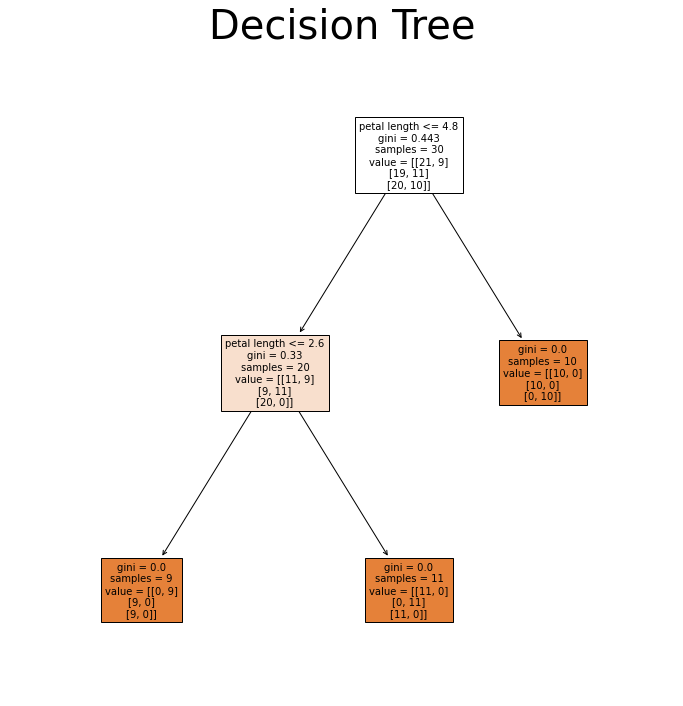

In [16]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(
    clf.fit(X_test, Y_test), 
    max_depth=4, 
    fontsize=10,filled=True,
    feature_names = ['sepal length','sepal width','petal length','petal width'],
    class_names=labels
)
plt.title('Decision Tree',fontsize=40)
plt.show()

In [17]:
def takeinput():
    x = float(input("Enter Sepal Length : "))
    y = float(input("Enter Sepal Width : "))
    z = float(input("Enter Petal Length : "))
    w = float(input("Enter Petal Width : "))
    return [x,y,z,w]

In [18]:
def predict():
    pred = takeinput()
    pred = np.array(pred)
    pred = pred.reshape(1,-1)
    prediction = clf.predict(pred)
    t = np.argmax(prediction[0])
    return labels[t]

In [19]:
predict()

Enter Sepal Length : 2.3
Enter Sepal Width : 4.4
Enter Petal Length : 6
Enter Petal Width : 5.1


'Iris-virginica'